In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [31]:
d = xr.open_dataset('/g/data/qv56/replicas/input4MIPs/CMIP7/CMIP/uoexeter/UOEXETER-CMIP-2-0-0/atmos/mon/ext/gnz/v20250227/ext_input4MIPs_aerosolProperties_CMIP_UOEXETER-CMIP-2-0-0_gnz_175001-202312.nc')
# Climatology
dc = xr.open_dataset('/g/data/qv56/replicas/input4MIPs/CMIP7/CMIP/uoexeter/UOEXETER-CMIP-2-0-0/atmos/monC/ext/gnz/v20250227/ext_input4MIPs_aerosolProperties_CMIP_UOEXETER-CMIP-2-0-0_gnz_185001-202112-clim.nc')

In [32]:
# Why does this return a 2D array?
w550 = np.argwhere(d.wavelength.data==550e-9)[0,0]

lat_wts = np.diff(np.sin(np.radians(d.lat_bnds)), axis=1)
lat_wts.shape = (len(d.lat),)
lat_wts /= lat_wts.sum()
thick = d.height_bnds[:,1] - d.height_bnds[:,0]

In [33]:
def total_mean(ds):
    """ Properly month length weighted mean of a DataArray"""
    month_length = ds.time.dt.days_in_month
    mean = (ds*month_length).sum(dim='time') / month_length.sum()
    return mean

In [34]:
ext_g = (d.ext[:,:,:,w550] * lat_wts[:, np.newaxis]).sum('lat')
ext_tot = (ext_g * thick).sum('height')
# PI should use 1850-2021 mean
ext_mean = total_mean(ext_tot.sel(time=slice("1850-01-01", "2021-12-01")))

In [36]:
# Climatology
ext_c_g = (dc.ext[:,:,:,w550] * lat_wts[:, np.newaxis]).sum('lat')
ext_c_tot = (ext_c_g * thick).sum('height')
ext_c_mean = total_mean(ext_c_tot)

In [40]:
print(f"Global means: Climatology {ext_c_mean:.4f}, Recalculated 1850-2021 {ext_mean:.4f}")

Global means: Climatology 0.0141, Recalculated 1850-2021 0.0138


In [43]:
ext = total_mean(d.ext[:,:,:,w550].sel(time=slice("1850-01-01", "2021-12-01")))
ext_c = total_mean(dc.ext[:,:,:,w550])

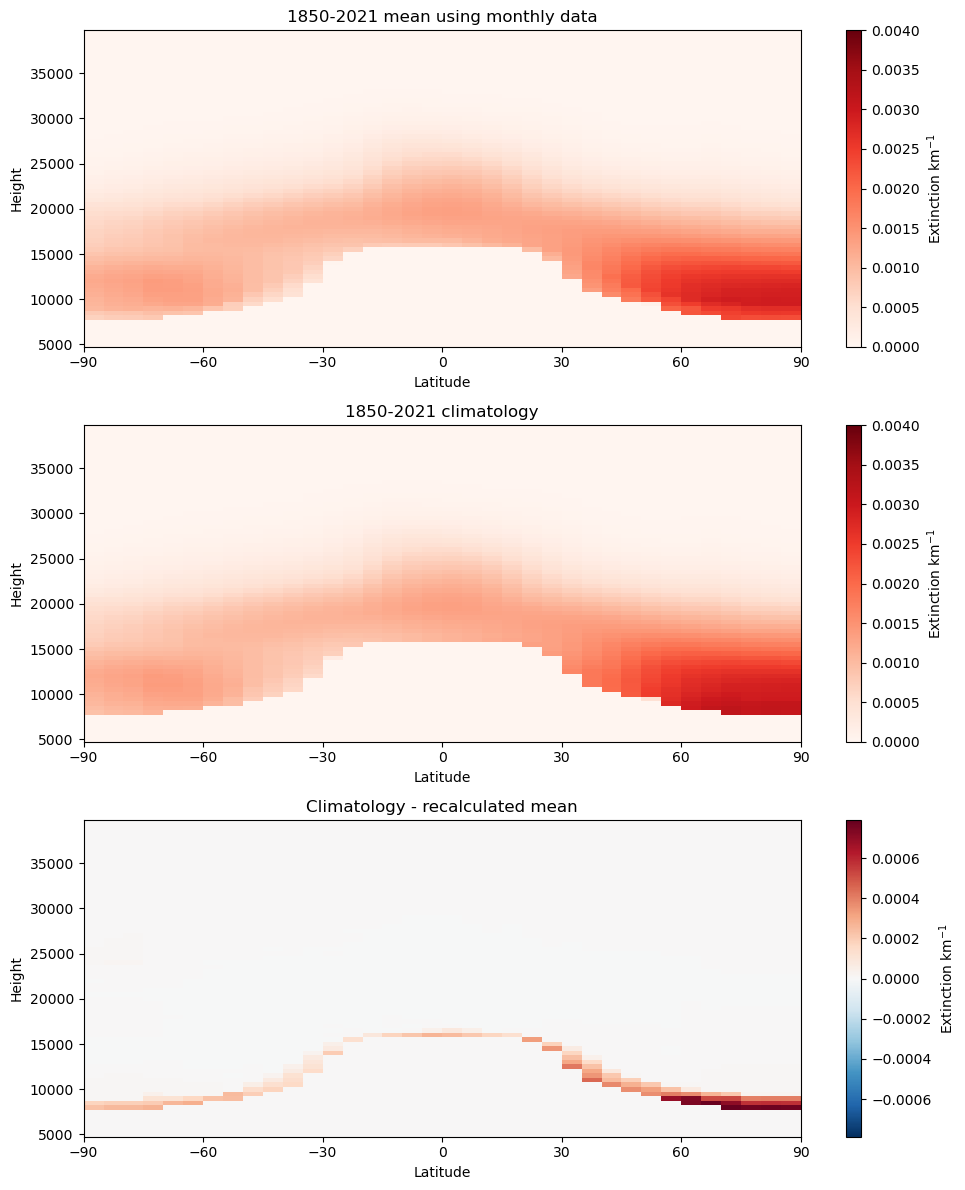

In [ ]:
cbar_kwargs={'label':'Extinction km$^{-1}$'}
fig = plt.figure(figsize=(10,12))
axes = fig.add_subplot(3,1,1)
(1000*ext).plot(cmap='Reds', x='lat', vmax=0.004, cbar_kwargs=cbar_kwargs)
axes.set_ylabel('Height')
axes.set_xlabel('Latitude')
axes.set_xticks(np.linspace(-90,90,7))
axes.set_title('1850-2021 mean using monthly data')

axes = fig.add_subplot(3,1,2)
(1000*ext_c).plot(cmap='Reds', x='lat', vmax=0.004, cbar_kwargs=cbar_kwargs)
axes.set_ylabel('Height')
axes.set_xlabel('Latitude')
axes.set_xticks(np.linspace(-90,90,7))
axes.set_title('1850-2021 climatology')

axes = fig.add_subplot(3,1,3)
(1000*(ext_c-ext)).plot(x='lat', cbar_kwargs=cbar_kwargs)
axes.set_ylabel('Height')
axes.set_xlabel('Latitude')
axes.set_xticks(np.linspace(-90,90,7))
axes.set_title('Climatology - recalculated mean')
plt.tight_layout()